In [1]:
# !pip install tenseal

In [2]:
# !pip install opencv-python
# ! pip install matplotlib

In [3]:
import cv2

from secPysift import *

IMG_NAME = 'uwu'
img1 = cv2.imread('uwu.png', 0)
# resize to 20 x 20
img1 = cv2.resize(img1, (20, 20))

In [4]:
img1.shape

(20, 20)

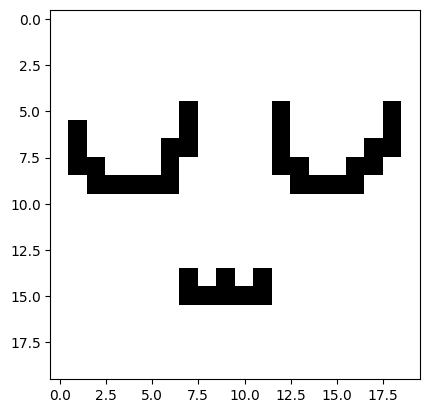

<Figure size 1000x1000 with 0 Axes>

In [5]:
from matplotlib import pyplot as plt
def plot_image(img, figure_size=(10, 10)):
    plt.imshow(img, cmap='gray')
    plt.figure(figsize=figure_size)
    plt.show()

plot_image(img1)

In [6]:
img1.shape

(20, 20)

In [7]:
import numpy as np
import tenseal as ts

In [8]:
## Encryption Parameters

# controls precision of the fractional part
bits_scale = 26

# Create TenSEAL context
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[31, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, 31]
)

# set the scale
context.global_scale = pow(2, bits_scale)

# galois keys are required to do ciphertext rotations
context.generate_galois_keys()

secret_key = context.secret_key()
context.make_context_public()

In [9]:
def enc(image):
    enc_img = [[ts.ckks_vector(context=context, vector=[col]) for col in row] for row in image]
    enc_img = np.array(enc_img, dtype=ts.CKKSVector)

    return enc_img


In [10]:
enc_img = [[ts.ckks_vector(context=context, vector=[col]) for col in row] for row in img1]
enc_img = np.array(enc_img, dtype=ts.CKKSVector)
enc_img

array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fb0c680d940>,
      dtype=object)

In [11]:
enc_img = enc(img1)

In [12]:
base_image = secGenerateBaseImage(enc_img, 1.6, 0.5, kernel_size=3)

Resize done


In [13]:
# base_image.shape

In [14]:
def dec(image):
    return np.array([[x.decrypt(secret_key) for x in row] for row in image])

In [15]:
# temp = dec(base_image)

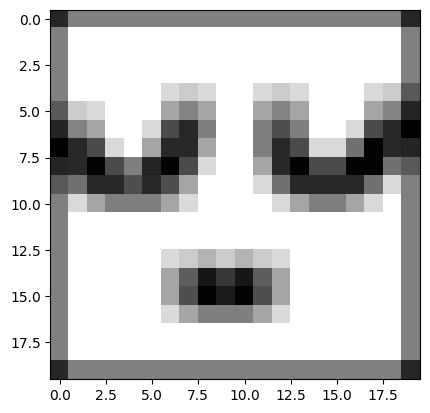

<Figure size 1000x1000 with 0 Axes>

In [16]:
plot_image(dec(base_image))

In [17]:
num_octaves = secComputeNumberOfOctaves(img1.shape)

In [18]:
num_octaves

3

In [19]:
gaussian_kernels = secGenerateGaussianKernels(1.6, 3)

In [20]:
gaussian_kernels

array([1.6       , 1.2262735 , 1.54500779, 1.94658784, 2.452547  ,
       3.09001559])

In [21]:
# gaussian_images = secGenerateGaussianImages(base_image, num_octaves, gaussian_kernels)

In [22]:
# gaussian_images[0][0].shape

In [23]:
# for oct in range(num_octaves):
#     for i in range(len(gaussian_images[oct])):
#         cv2.imwrite(f'{IMG_NAME}-{oct}-{i}.png',dec(gaussian_images[oct][i]))

In [24]:
gaussian_images = [[cv2.imread(f'{IMG_NAME}-{oct}-{i}.png', 0) for i in range(6)] for oct in range(num_octaves) ]

In [25]:
gaussian_images[0][0].shape

(20, 20)

Octave 1


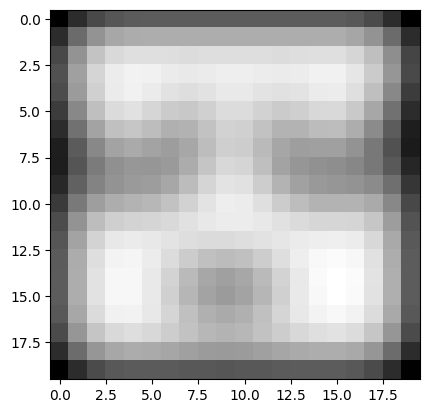

<Figure size 500x500 with 0 Axes>

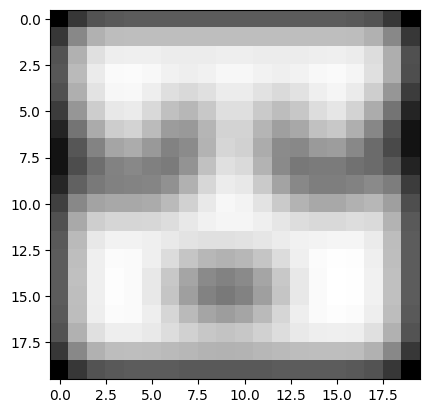

<Figure size 500x500 with 0 Axes>

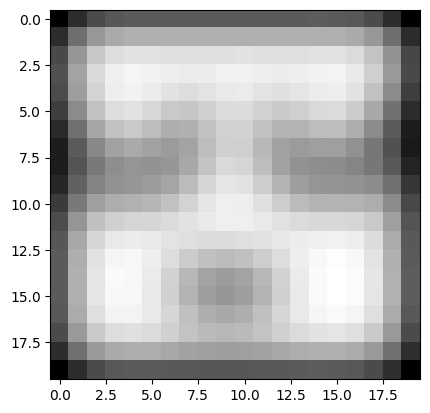

<Figure size 500x500 with 0 Axes>

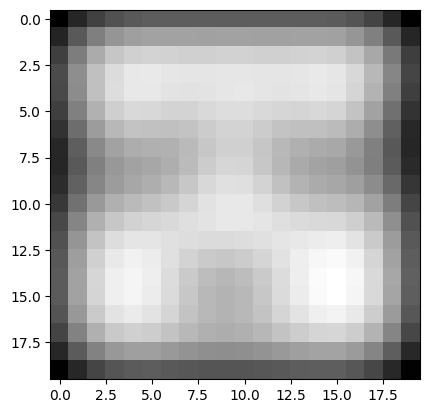

<Figure size 500x500 with 0 Axes>

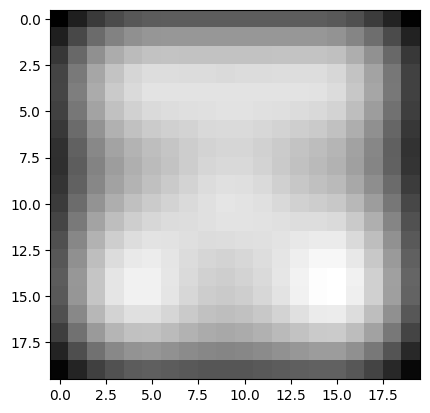

<Figure size 500x500 with 0 Axes>

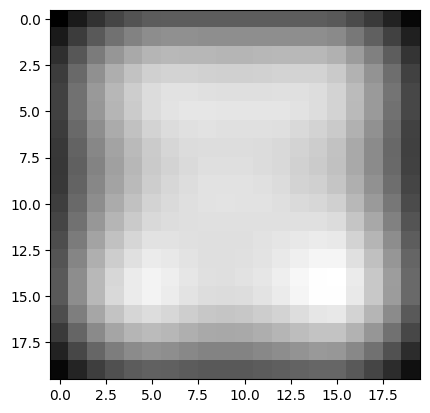

<Figure size 500x500 with 0 Axes>

Octave 2


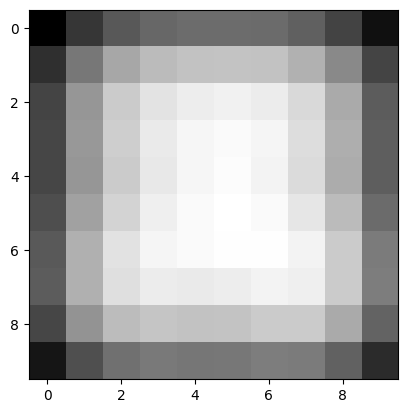

<Figure size 500x500 with 0 Axes>

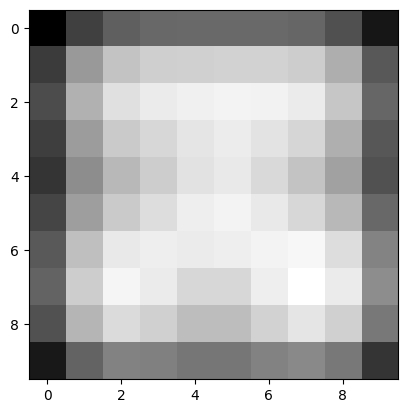

<Figure size 500x500 with 0 Axes>

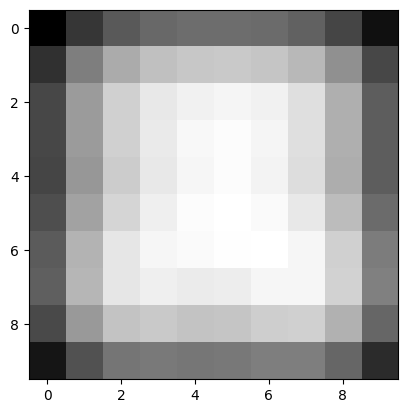

<Figure size 500x500 with 0 Axes>

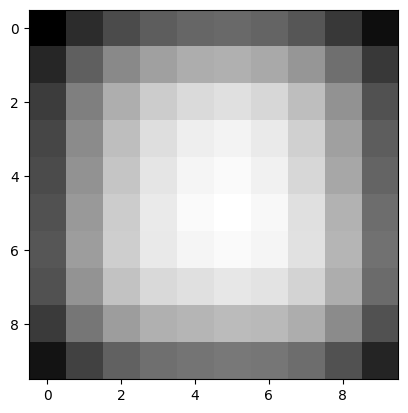

<Figure size 500x500 with 0 Axes>

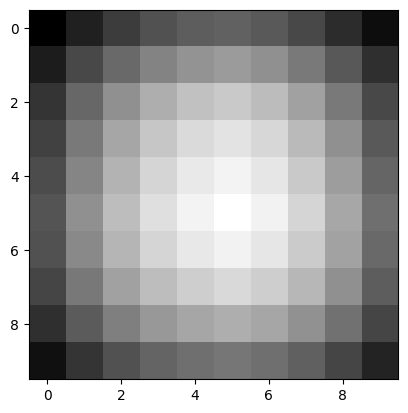

<Figure size 500x500 with 0 Axes>

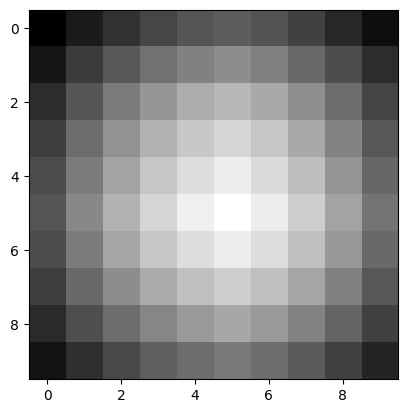

<Figure size 500x500 with 0 Axes>

Octave 3


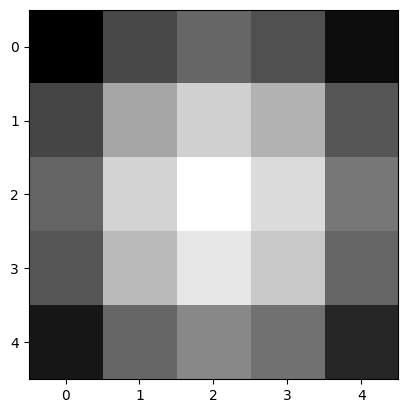

<Figure size 500x500 with 0 Axes>

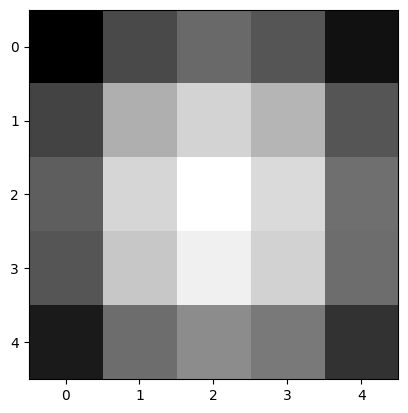

<Figure size 500x500 with 0 Axes>

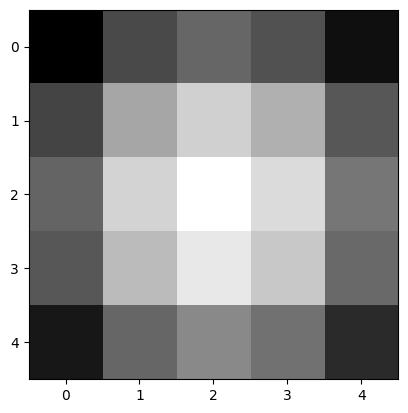

<Figure size 500x500 with 0 Axes>

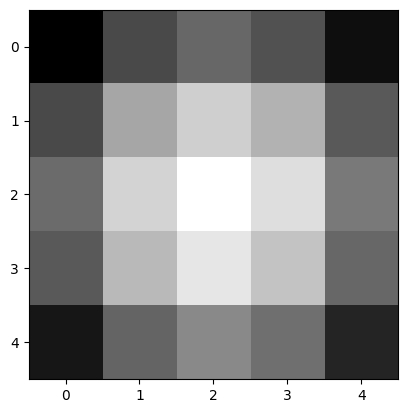

<Figure size 500x500 with 0 Axes>

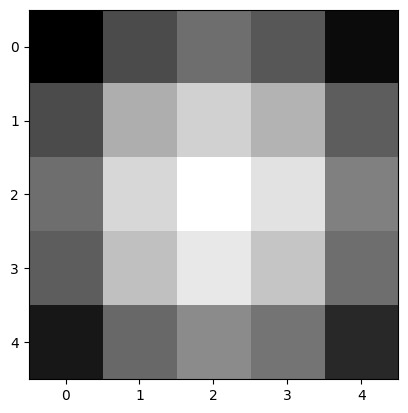

<Figure size 500x500 with 0 Axes>

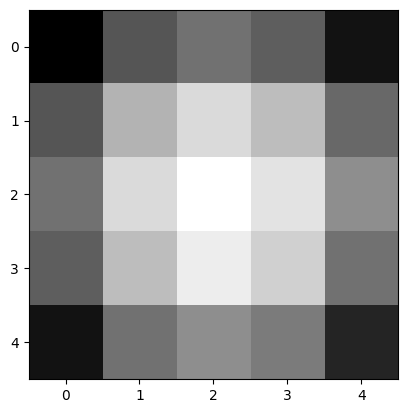

<Figure size 500x500 with 0 Axes>

In [26]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for image in gaussian_images[octave]:
        plot_image(image, figure_size=(5, 5))

In [27]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for i in range(len(gaussian_images[octave])):
        gaussian_images[octave][i] = enc(gaussian_images[octave][i])

Octave 1
Octave 2
Octave 3


In [28]:
# dog_images = secGenerateDoGImages(gaussian_images)

In [29]:
# dog_images[0][0].shape

In [30]:
# for octave in range(num_octaves):
#     print(f'Octave {octave + 1}')
#     for image in dog_images[octave]:
#         plot_image(dec(image), figure_size=(5, 5))

In [31]:
# for oct in range(num_octaves):
#     for i in range(len(dog_images[oct])):
#         cv2.imwrite(f'dog-{IMG_NAME}-{oct}-{i}.png',dec(dog_images[oct][i]))

In [32]:
dog_images = [[cv2.imread(f'dog-{IMG_NAME}-{oct}-{i}.png', 0) for i in range(5)] for oct in range(num_octaves) ]

In [33]:
dog_images[0][0]

array([[ 5, 11, 11,  7,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         6, 10, 11,  5],
       [11, 24, 23, 18, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        19, 23, 24, 12],
       [12, 24, 23, 17, 14, 14, 13, 14, 13, 14, 14, 13, 14, 13, 13, 14,
        18, 24, 25, 12],
       [ 8, 21, 18, 12,  9,  8,  7,  6,  7,  9,  9,  7,  6,  7,  8,  9,
        13, 18, 20,  8],
       [ 7, 17, 16, 11,  8,  5,  1,  0,  2,  5,  5,  2,  0,  2,  6,  9,
        11, 14, 13,  4],
       [ 4, 13, 13, 12, 10,  5,  0,  0,  0,  5,  5,  0,  0,  0,  7, 12,
        10,  7,  6,  0],
       [ 0,  6,  9, 12, 12,  2,  0,  0,  0,  5,  5,  0,  0,  0,  7, 11,
         5,  1,  0,  0],
       [ 0,  1,  1,  5,  5,  0,  0,  0,  0,  8,  6,  0,  0,  0,  0,  2,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  9,  7,  0,  0,  0,  0,  0,
         0,  0,  5,  3],
       [ 3,  5,  0,  0,  0,  0,  0,  0,  5,  9,  8,  1,  0,  0,  0,  0,
         0,  3, 13,  9],
       [ 8, 14,  7,  0,  0,  0

Octave 1


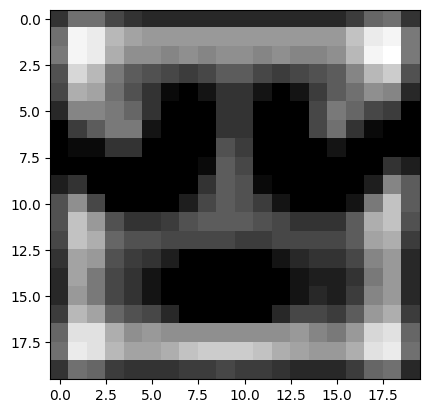

<Figure size 500x500 with 0 Axes>

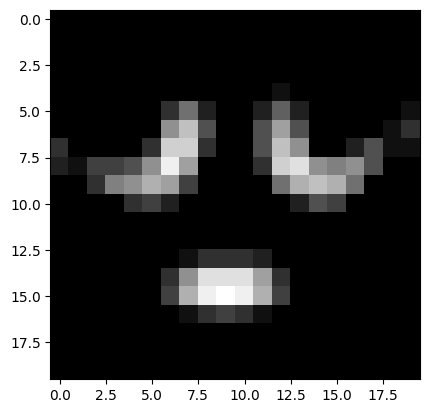

<Figure size 500x500 with 0 Axes>

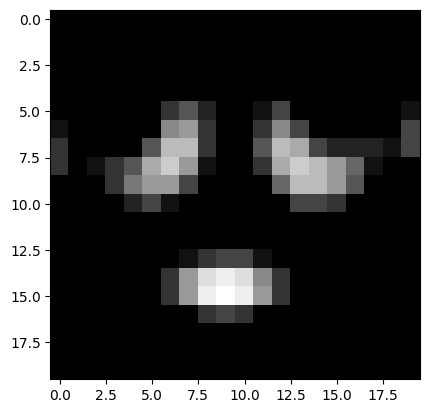

<Figure size 500x500 with 0 Axes>

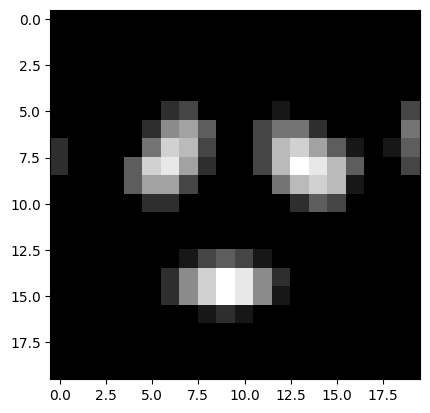

<Figure size 500x500 with 0 Axes>

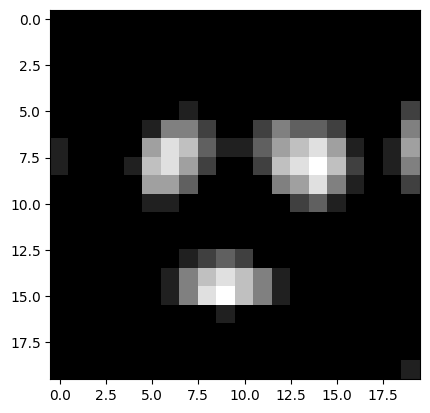

<Figure size 500x500 with 0 Axes>

Octave 2


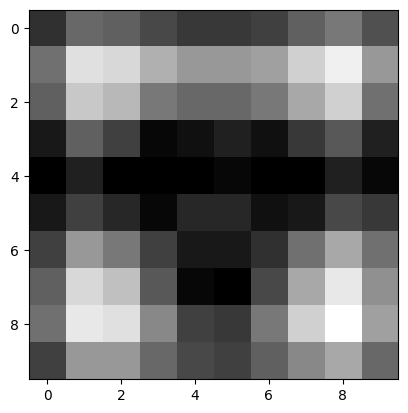

<Figure size 500x500 with 0 Axes>

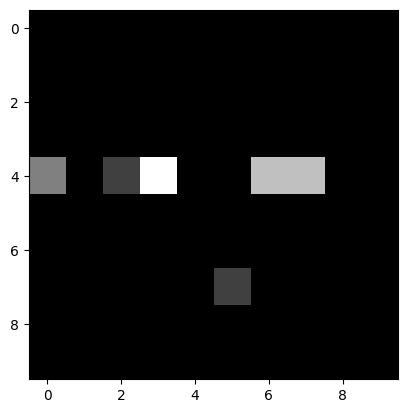

<Figure size 500x500 with 0 Axes>

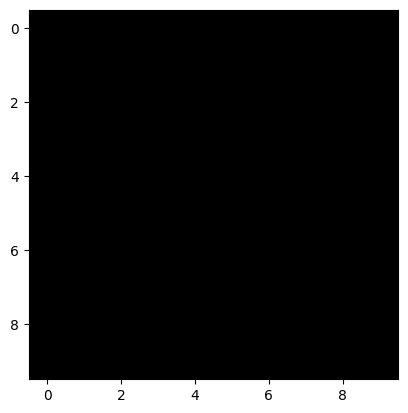

<Figure size 500x500 with 0 Axes>

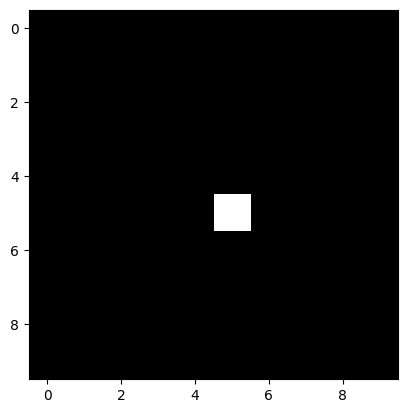

<Figure size 500x500 with 0 Axes>

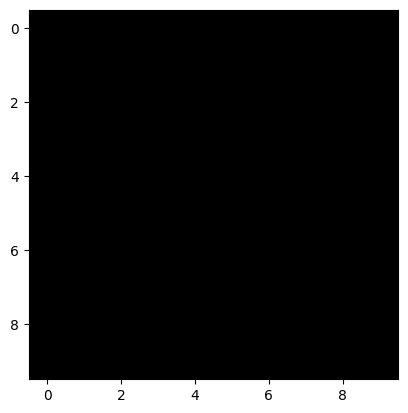

<Figure size 500x500 with 0 Axes>

Octave 3


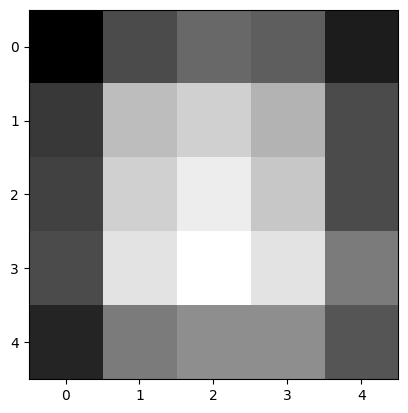

<Figure size 500x500 with 0 Axes>

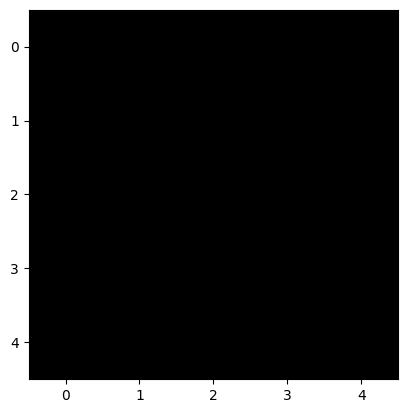

<Figure size 500x500 with 0 Axes>

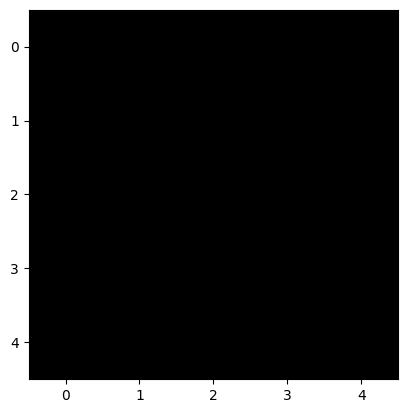

<Figure size 500x500 with 0 Axes>

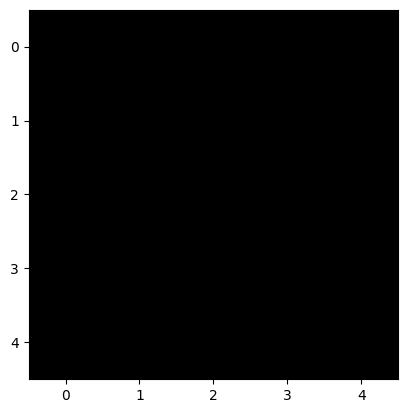

<Figure size 500x500 with 0 Axes>

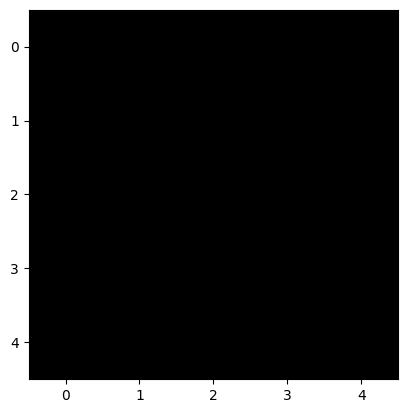

<Figure size 500x500 with 0 Axes>

In [34]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for image in dog_images[octave]:
        plot_image(image, figure_size=(5, 5))

In [35]:
def cmp(x, a, b):
    if isinstance(x, ts.CKKSVector):
        x = x.decrypt(secret_key)[0]
    if isinstance(a, ts.CKKSVector):
        a = a.decrypt(secret_key)[0]
    if isinstance(b, ts.CKKSVector):
        b = b.decrypt(secret_key)[0]
    return ts.ckks_vector(context=context, vector=[int(a < x < b)])
    

In [36]:
sigma=1.6
num_intervals=3
assumed_blur=0.5
image_border_width=5

In [37]:
for octave in range(num_octaves):
    for i in range(len(dog_images[octave])):
        dog_images[octave][i] = enc(dog_images[octave][i])

In [38]:
dog_images

[[array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fb0c67806b0>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fb0c66e4b30>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fb0c683a600>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fafa2461ee0>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fafa2482f90>,
        dtype=object)],
 [array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fb0512829f0>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fafa2474ce0>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fafa2475fa0>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fafa2477320>,
        dtype=object),
  array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fafa248f860>,
        dtype=object)],
 [array(

In [39]:
def refresh(value):
    # print("Value: ", value)
    decrypted_value = value.decrypt(secret_key)[0]
    return ts.ckks_vector(context=context, vector=[decrypted_value])

In [40]:
# def secFindScaleSpaceExtrema(gaussian_images, dog_images, num_intervals, sigma, image_border_width, contrast_threshold=0.04, cmp=None, refresh = lambda x: x):
#     """
#         Only gaussian_images, dog_images are encrypted
#     """

#     threshold = np.floor(0.5 * contrast_threshold / num_intervals * 255)  # from OpenCV implementation
#     keypoints = []
#     flat_list = []

#     for octave_index, dog_images_in_octave in enumerate(dog_images):
#         octave_keypoints = []
#         for image_index, (first_image, second_image, third_image) in enumerate(zip(dog_images_in_octave, dog_images_in_octave[1:], dog_images_in_octave[2:])):
#             # (i, j) is the center of the 3x3 array
#             img_keypoints = []
#             for i in range(image_border_width, first_image.shape[0] - image_border_width):
#                 row_keypoints = []
#                 for j in range(image_border_width, first_image.shape[1] - image_border_width):
#                     # if isPixelAnExtremum(first_image[i-1:i+2, j-1:j+2], second_image[i-1:i+2, j-1:j+2], third_image[i-1:i+2, j-1:j+2], threshold):
#                     print("i, j: ", i, j)   
#                     keypoint = localizeExtremumViaQuadraticFit(i, j, image_index + 1, octave_index, num_intervals, dog_images_in_octave, sigma, contrast_threshold, image_border_width, cmp=cmp, refresh = refresh)
                    
#                     keypoints_with_orientations = computeKeypointsWithOrientations(keypoint, octave_index, gaussian_images[octave_index][image_index + 1], cmp=cmp, refresh = refresh)
#                     # keypoints_with_orientations = [keypoint]*36
#                     flat_list.append(keypoints_with_orientations)
#                     row_keypoints.append(keypoints_with_orientations)
#                     break
#                 img_keypoints.append(row_keypoints)
#                 break
#             octave_keypoints.append(img_keypoints)
#             break
#         keypoints.append(octave_keypoints)
#         break
#                     # keypoints.append(keypoint_with_orientation)
#     return keypoints, flat_list


    

# def isPixelAnExtremum(first_subimage, second_subimage, third_subimage, threshold):
#     """
#         threshold is not encrypted
#         Return True if the center element of the 3x3x3 input array is strictly greater than or less than all its neighbors, False otherwise
#     """
#     center_pixel_value = second_subimage[1, 1]
    
#     if abs(center_pixel_value) > threshold:
#         if center_pixel_value > 0:
#             return (center_pixel_value >= first_subimage).all() and \
#                    (center_pixel_value >= third_subimage).all() and \
#                    (center_pixel_value >= second_subimage[0, :]).all() and \
#                    (center_pixel_value >= second_subimage[2, :]).all() and \
#                    center_pixel_value >= second_subimage[1, 0] and \
#                    center_pixel_value >= second_subimage[1, 2]
#         elif center_pixel_value < 0:
#             return (center_pixel_value <= first_subimage).all() and \
#                    (center_pixel_value <= third_subimage).all() and \
#                    (center_pixel_value <= second_subimage[0, :]).all() and \
#                    (center_pixel_value <= second_subimage[2, :]).all() and \
#                    center_pixel_value <= second_subimage[1, 0] and \
#                    center_pixel_value <= second_subimage[1, 2]

#     # if secComparePixel(abs(center_pixel_value), threshold):
#     #     if secComparePixel(center_pixel_value, 0):
#     #         return secCompareAll2DisMinima(first_subimage, center_pixel_value) and \
#     #                secCompareAll2DisMinima(third_subimage, center_pixel_value) and \
#     #                secCompareAll2DisMinima(second_subimage[0, :], center_pixel_value) and \
#     #                secCompareAll2DisMinima(second_subimage[2, :], center_pixel_value) and \
#     #                secComparePixel(center_pixel_value, second_subimage[1, 0]) and \
#     #                secComparePixel(center_pixel_value , second_subimage[1, 2])
#     #     elif secComparePixel(0, center_pixel_value):
#     #         return secCompareAll2DisMaxima(first_subimage, center_pixel_value) and \
#     #                secCompareAll2DisMaxima(third_subimage, center_pixel_value) and \
#     #                secCompareAll2DisMaxima(second_subimage[0, :], center_pixel_value) and \
#     #                secCompareAll2DisMaxima(second_subimage[2, :], center_pixel_value) and \
#     #                secComparePixel(center_pixel_value, second_subimage[1, 0]) and \
#     #                secComparePixel(center_pixel_value , second_subimage[1, 2])
#     return False

# def localizeExtremumViaQuadraticFit(i, j, image_index, octave_index, num_intervals, dog_images_in_octave, sigma, contrast_threshold, image_border_width, eigenvalue_ratio=10, num_attempts_until_convergence=1, cmp = None, refresh = lambda x: x):
#     """Iteratively refine pixel positions of scale-space extrema via quadratic fit around each extremum's neighbors
#     """
#     print("Num attempts: ", num_attempts_until_convergence)
#     extremum_is_outside_image = False
#     image_shape = dog_images_in_octave[0].shape
#     extremum_update = np.array([1, 1, 1], dtype='float32')  # (di, dj, ds)
#         # need to convert from uint8 to float32 to compute derivatives and need to rescale pixel values to [0, 1] to apply Lowe's thresholds
#     first_image, second_image, third_image = dog_images_in_octave[image_index-1:image_index+2]
#     pixel_cube = np.stack([first_image[i-1:i+2, j-1:j+2],
#                         second_image[i-1:i+2, j-1:j+2],
#                         third_image[i-1:i+2, j-1:j+2]]) * (1 / 255)
#     gradient = computeGradientAtCenterPixel(pixel_cube)
#     hessian = computeHessianAtCenterPixel(pixel_cube)
#     ltsq_val, denominator = secLTSQ(hessian, gradient)
#     # ltsq_val = ltsq_val[0]
#     extremum_update = -ltsq_val
#     extremum_update = refresh(extremum_update)

#     # cmp = lambda x, a, b: a < x < b
#     # condition1 =  abs(extremum_update[0]) < 0.5 * denominator and abs(extremum_update[1]) < 0.5 * denominator and abs(extremum_update[2]) < 0.5 * denominator
#     condition1 = (cmp(extremum_update[0], -0.5 * denominator, 0.5 * denominator) 
#                     * cmp(extremum_update[1], -0.5 * denominator, 0.5 * denominator) 
#                     * cmp(extremum_update[2], -0.5 * denominator, 0.5 * denominator))
#     functionValueAtUpdatedExtremum = pixel_cube[1, 1, 1] * denominator + 0.5 * np.dot(gradient, extremum_update)
#     functionValueAtUpdatedExtremum = refresh(functionValueAtUpdatedExtremum)

#     # condition2 = abs(functionValueAtUpdatedExtremum) * num_intervals >= contrast_threshold * denominator
#     condition2 = -cmp(functionValueAtUpdatedExtremum * num_intervals, -contrast_threshold * denominator, -contrast_threshold * denominator) + 1
    
#     xy_hessian = hessian[:2, :2]
#     xy_hessian_trace = secTrace(xy_hessian)
#     xy_hessian_det = secDet2x2(xy_hessian)
#     # condition3 =  xy_hessian_det > 0 and eigenvalue_ratio * (xy_hessian_trace ** 2) < ((eigenvalue_ratio + 1) ** 2) * xy_hessian_det
#     condition3 = cmp(xy_hessian_det, 0, 10000) * cmp(eigenvalue_ratio * (xy_hessian_trace ** 2), -10000, ((eigenvalue_ratio + 1) ** 2) * xy_hessian_det)
#     # Contrast check passed -- construct and return OpenCV KeyPoint object
#     # Ignoring extram_update[2] in size, because it will be of the order 1 - 1.2 which is negligible
#     keypoint = EncKeyPoint(
#         i = i,
#         j = j,
#         is_keypoint_present = condition1 * condition2 * condition3,
#         size = sigma * (2 ** ((image_index) / (num_intervals))) * (2 ** (octave_index + 1)),
#         # response= secAbs(functionValueAtUpdatedExtremum) # check if needed later
#         response= (functionValueAtUpdatedExtremum)
#     )
#     # keypoint.pt = ((j + extremum_update[0]) * (2 ** octave_index), (i + extremum_update[1]) * (2 ** octave_index))
#     # keypoint.octave = octave_index + image_index * (2 ** 8) + int(round((extremum_update[2] + 0.5) * 255)) * (2 ** 16)
#     # keypoint.size = sigma * (2 ** ((image_index + extremum_update[2]) / np.float32(num_intervals))) * (2 ** (octave_index + 1))  # octave_index + 1 because the input image was doubled
#     # keypoint.response = secAbs(functionValueAtUpdatedExtremum)
#     return keypoint
#     # return None

# def computeGradientAtCenterPixel(pixel_array):
#     """Approximate gradient at center pixel [1, 1, 1] of 3x3x3 array using central difference formula of order O(h^2), where h is the step size
#     """
#     # With step size h, the central difference formula of order O(h^2) for f'(x) is (f(x + h) - f(x - h)) / (2 * h)
#     # Here h = 1, so the formula simplifies to f'(x) = (f(x + 1) - f(x - 1)) / 2
#     # NOTE: x corresponds to second array axis, y corresponds to first array axis, and s (scale) corresponds to third array axis
#     dx = 0.5 * (pixel_array[1, 1, 2] - pixel_array[1, 1, 0])
#     dy = 0.5 * (pixel_array[1, 2, 1] - pixel_array[1, 0, 1])
#     ds = 0.5 * (pixel_array[2, 1, 1] - pixel_array[0, 1, 1])
#     return np.array([dx, dy, ds])

# def computeHessianAtCenterPixel(pixel_array):
#     """Approximate Hessian at center pixel [1, 1, 1] of 3x3x3 array using central difference formula of order O(h^2), where h is the step size
#     """
#     # With step size h, the central difference formula of order O(h^2) for f''(x) is (f(x + h) - 2 * f(x) + f(x - h)) / (h ^ 2)
#     # Here h = 1, so the formula simplifies to f''(x) = f(x + 1) - 2 * f(x) + f(x - 1)
#     # With step size h, the central difference formula of order O(h^2) for (d^2) f(x, y) / (dx dy) = (f(x + h, y + h) - f(x + h, y - h) - f(x - h, y + h) + f(x - h, y - h)) / (4 * h ^ 2)
#     # Here h = 1, so the formula simplifies to (d^2) f(x, y) / (dx dy) = (f(x + 1, y + 1) - f(x + 1, y - 1) - f(x - 1, y + 1) + f(x - 1, y - 1)) / 4
#     # NOTE: x corresponds to second array axis, y corresponds to first array axis, and s (scale) corresponds to third array axis
#     center_pixel_value = pixel_array[1, 1, 1]
#     dxx = pixel_array[1, 1, 2] - 2 * center_pixel_value + pixel_array[1, 1, 0]
#     dyy = pixel_array[1, 2, 1] - 2 * center_pixel_value + pixel_array[1, 0, 1]
#     dss = pixel_array[2, 1, 1] - 2 * center_pixel_value + pixel_array[0, 1, 1]
#     dxy = 0.25 * (pixel_array[1, 2, 2] - pixel_array[1, 2, 0] - pixel_array[1, 0, 2] + pixel_array[1, 0, 0])
#     dxs = 0.25 * (pixel_array[2, 1, 2] - pixel_array[2, 1, 0] - pixel_array[0, 1, 2] + pixel_array[0, 1, 0])
#     dys = 0.25 * (pixel_array[2, 2, 1] - pixel_array[2, 0, 1] - pixel_array[0, 2, 1] + pixel_array[0, 0, 1])
#     return np.array([[dxx, dxy, dxs], 
#                   [dxy, dyy, dys],
#                   [dxs, dys, dss]])

# # #########################
# # # Keypoint orientations #
# # #########################

# def computeKeypointsWithOrientations(keypoint, octave_index, gaussian_image, radius_factor=3, num_bins=36, peak_ratio=0.8, scale_factor=1.5, cmp=None, refresh = lambda x: x):
#     """Compute orientations for each keypoint
#     """
#     # logger.debug('Computing keypoint orientations...')
#     keypoints_with_orientations = []
#     image_shape = gaussian_image.shape
#     scale = scale_factor * keypoint.size / np.float32(2 ** (octave_index + 1))  # compare with keypoint.size computation in localizeExtremumViaQuadraticFit()
#     # radius = int(round(radius_factor * scale))
#     radius = 3
#     # print("Radius: ", radius)

#     weight_factor = -0.5 / (scale ** 2)
#     raw_histogram = np.zeros(num_bins)
#     encrypted_1 = gaussian_image[0, 0]
#     smooth_histogram = np.zeros(num_bins) * encrypted_1
#     tan_right_bins = np.zeros(num_bins // 4) * encrypted_1  # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
#     tan_left_bins = np.zeros(num_bins // 4) * encrypted_1     # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
#     cot_up_bins = np.zeros(num_bins // 4) * encrypted_1       # otherwise, abs(dx) < abs(dy)
#     cot_down_bins = np.zeros(num_bins // 4) * encrypted_1      # otherwise, abs(dx) < abs(dy)
    
#     # print("tan_right_bins : ", tan_right_bins +1.5)

#     tan_right_edges = np.linspace(-45, 45, num_bins // 4 + 1)
#     tan_left_edges = np.linspace(135, 225, num_bins // 4 + 1)
#     cot_up_edges = np.linspace(45, 135, num_bins // 4 + 1)
#     cot_down_edges = np.linspace(225, 315, num_bins // 4 + 1)


#     np.cot = lambda x: -np.tan(x + np.pi/2)
#     for i in range(-radius, radius + 1):
#         region_y = int(round(keypoint.j / np.float32(2 ** octave_index))) + i
#         if region_y > 0 and region_y < image_shape[0] - 1:
#             for j in range(-radius, radius + 1):
#                 region_x = int(round(keypoint.i / np.float32(2 ** octave_index))) + j
#                 if region_x > 0 and region_x < image_shape[1] - 1:
#                     dx = gaussian_image[region_y, region_x + 1] - gaussian_image[region_y, region_x - 1]
#                     dy = gaussian_image[region_y - 1, region_x] - gaussian_image[region_y + 1, region_x]
#                     gradient_magnitude = dx * dx + dy * dy
#                     # TODO :square root
#                     # gradient_orientation = np.rad2deg(np.arctan2(dy, dx))
#                     weight = np.exp(weight_factor * (i ** 2 + j ** 2))  # constant in front of exponential can be dropped because we will find peaks later
#                     # histogram_index = int(round(gradient_orientation * num_bins / 360.))
#                     is_tan = cmp(dy, -dx, dx)
#                     is_cot = cmp(dx, -dy, dy)
#                     is_tan_right = cmp(dy, 0, 10000)
#                     is_tan_left = cmp(dy, -10000, 0)
#                     is_cot_up = cmp(dx, 0, 10000)
#                     is_cot_down = cmp(dx, -10000, 0)

#                     # print("weight : ", weight)
#                     # print("gradient_magnitude : ", gradient_magnitude)
#                     # print("dx : ", dx)
#                     # print("dy : ", dy)
#                     # print("is_tan : ", is_tan)
#                     # print("is_cot : ", is_cot)
#                     # print("is_tan_right : ", is_tan_right)
#                     # print("is_tan_left : ", is_tan_left)
                    
#                     for i, (l, r) in enumerate(zip(tan_right_edges, tan_right_edges[1:])):
#                         cond = cmp(dy, dx * np.tan(np.deg2rad(l)), dx * np.tan(np.deg2rad(r)))
#                         # print(tmp)
#                         tan_right_bins[i] += weight * gradient_magnitude * cond * is_tan_right * is_tan
#                         # tan_right_bins[i] += weight * gradient_magnitude 
#                         # tan_right_bins[i] += weight * gradient_magnitude * cond
#                         # tan_right_bins[i] += weight * gradient_magnitude * cond * is_tan_right 
#                         # tan_right_bins[i] += weight * gradient_magnitude * cond * is_tan_right * is_tan

#                     for i, (l, r) in enumerate(zip(tan_left_edges, tan_left_edges[1:])):
#                         cond = cmp(dy, dx * np.tan(np.deg2rad(l)), dx * np.tan(np.deg2rad(r)))
#                         tan_left_bins[i] += weight * gradient_magnitude * cond * is_tan_left * is_tan
                    
#                     for i, (l, r) in enumerate(zip(cot_up_edges, cot_up_edges[1:])):
#                         cond = cmp(dx, dy * np.cot(np.deg2rad(l)), dy * np.cot(np.deg2rad(r)))
#                         cot_up_bins[i] += weight * gradient_magnitude * cond * is_cot_up * is_cot

#                     for i, (l, r) in enumerate(zip(cot_down_edges, cot_down_edges[1:])):
#                         cond = cmp(dx, dy * np.cot(np.deg2rad(l)), dy * np.cot(np.deg2rad(r)))
#                         cot_down_bins[i] += weight * gradient_magnitude * cond * is_cot_down * is_cot

#                     # raw_histogram[histogram_index % num_bins] += weight * gradient_magnitude

#                     # new_keypoint = cv2.KeyPoint(*keypoint.pt, keypoint.size, gradient_orientation, keypoint.response, keypoint.octave)
#                     # keypoints_with_orientations.append(new_keypoint)
    
#     # This starts at -45 and goes anticlockwise
#     bins = np.concatenate((tan_right_bins, cot_up_bins, tan_left_bins, cot_down_bins))
#     bins = refresh(bins)
#     # for n in range(num_bins):
#     #     smooth_histogram[n] = (6 * bins[n] + 4 * (bins[n - 1] + bins[(n + 1) % num_bins]) + bins[n - 2] + bins[(n + 2) % num_bins]) * (1/16)
    
#     smooth_histogram = bins

#     def encmax2(a, b):
#         cond = cmp(b, a, 10000)
#         return (cond) * b + (1 - cond) * (a)
    
#     def vecmax(ls):
#         l = len(ls)
#         if l == 1:
#             return ls[0]
#         elif l == 2:
#             return encmax2(ls[0], ls[1])
#         else:
#             return encmax2(vecmax(ls[:l//2]), vecmax(ls[l//2:]))
    
#     orientation_max = vecmax(smooth_histogram)
#     # for i in range(1, len(smooth_histogram)):
#     #     orientation_max = encmax2(orientation_max, smooth_histogram[i])

#     orientation_max = refresh(orientation_max)
    
#     orientation_thresh = peak_ratio * orientation_max
#     orientation_peaks = np.zeros(num_bins)
#     right_shift_histogram = np.roll(smooth_histogram, 1)
#     left_shift_histogram = np.roll(smooth_histogram, -1)
#     keypoints_with_orientations = []
#     # angles = np.concatenate((ta))
#     for i in range(num_bins):
#         is_orientation_peak = (cmp(smooth_histogram[i], left_shift_histogram[i], 10000)
#                 * cmp(smooth_histogram[i], right_shift_histogram[i], 10000))
#         is_good_peak_value = cmp(smooth_histogram[i], orientation_thresh, 10000)
#         #           interpolated_peak_index = (peak_index + 0.5 * (left_value - right_value) / (left_value - 2 * peak_value + right_value)) % num_bins
#         interpolated_peak_index = i
#         orientation = 360. - (interpolated_peak_index * 360. / num_bins - 45) # because use started at 45
#         if abs(orientation - 360.) < 0.01:
#             orientation = 0

#         new_keypoint = EncKeyPoint(
#             i = keypoint.i,
#             j = keypoint.j,
#             is_keypoint_present = is_orientation_peak * is_good_peak_value,
# #           interpolated_peak_index = (peak_index + 0.5 * (left_value - right_value) / (left_value - 2 * peak_value + right_value)) % num_bins
#             size=keypoint.size,
#             response=keypoint.response,
#             angle=orientation,
#         )
#         keypoints_with_orientations.append(new_keypoint)
#     # orientation_peaks = np.where(np.logical_and(smooth_histogram > np.roll(smooth_histogram, 1), smooth_histogram > np.roll(smooth_histogram, -1)))[0]
#     # for peak_index in orientation_peaks:
#     #     peak_value = smooth_histogram[peak_index]
#     #     if peak_value >= peak_ratio * orientation_max:
#     #         # Quadratic peak interpolation
#     #         # The interpolation update is given by equation (6.30) in https://ccrma.stanford.edu/~jos/sasp/Quadratic_Interpolation_Spectral_Peaks.html
#     #         left_value = smooth_histogram[(peak_index - 1) % num_bins]
#     #         right_value = smooth_histogram[(peak_index + 1) % num_bins]
#     #         orientation = 360. - interpolated_peak_index * 360. / num_bins
#     #         if abs(orientation - 360.) < float_tolerance:
#     #             orientation = 0
#     #         new_keypoint = KeyPoint(*keypoint.pt, keypoint.size, orientation, keypoint.response, keypoint.octave)
#     #         keypoints_with_orientations.append(new_keypoint)
#     return keypoints_with_orientations


In [41]:
keypoints, flat_list = secFindScaleSpaceExtrema(gaussian_images, dog_images, num_intervals, sigma, image_border_width, cmp=cmp, refresh=np.vectorize(refresh))

i, j:  5 5
Num attempts:  1


/home/ishwar.b/secure-sift/src/secsift/secPysift.py:296: RuntimeWarning: divide by zero encountered in multiply
  smooth_histogram = np.zeros(num_bins) * encrypted_1
/home/ishwar.b/secure-sift/src/secsift/secPysift.py:296: RuntimeWarning: invalid value encountered in multiply
  smooth_histogram = np.zeros(num_bins) * encrypted_1
/home/ishwar.b/secure-sift/src/secsift/secPysift.py:297: RuntimeWarning: divide by zero encountered in multiply
  tan_right_bins = np.zeros(num_bins // 4) * encrypted_1  # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
/home/ishwar.b/secure-sift/src/secsift/secPysift.py:297: RuntimeWarning: invalid value encountered in multiply
  tan_right_bins = np.zeros(num_bins // 4) * encrypted_1  # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
/home/ishwar.b/secure-sift/src/secsift/secPysift.py:298: RuntimeWarning: divide by zero encountered in multiply
  tan_left_bins = np.zeros(num_bins // 4) * encrypted_

In [42]:
x = keypoints[0][0][0][0][0]

In [43]:
x

In [44]:
with open("keypoints.txt", "w") as f:
    f.write(str(x))
    # print all attributes of the object
    for attr in dir(x):
        f.write("obj.%s = %r" % (attr, getattr(x, attr)))

In [45]:
x.is_keypoint_present.decrypt(secret_key)[0]

-1.1952052563141174e-05

In [46]:
error_margin = 0.0001


In [47]:
def iterimg(imgs):
    for octave in range(num_octaves):
        for i in range(len(imgs[octave])):
            yield np.array(imgs[octave][i])

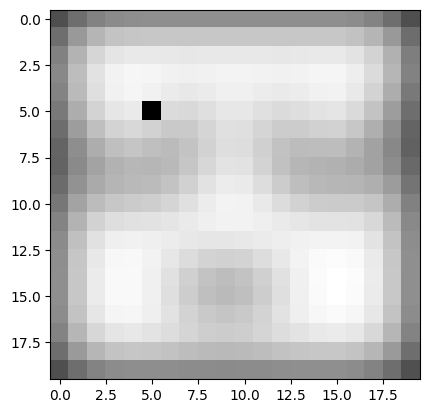

<Figure size 1000x1000 with 0 Axes>

IndexError: list index out of range

In [48]:
for kp, img in zip(iterimg(keypoints), iterimg(gaussian_images)):
    # print(kp.shape, (img).shape)
    dec_img = dec(img)
    for k in kp.flatten():
        dec_img[k.i][k.j] *= 0 if k.is_keypoint_present.decrypt(secret_key)[0] > 0.5 else 1
    plot_image(dec_img)


In [49]:
kp = EncKeyPoint(i=10, j=10, octave=1, is_keypoint_present=True, size=2, angle=0, response=None)

In [50]:

# def unpackOctave(keypoint):
#     """Compute octave, layer, and scale from a keypoint
#     """
#     octave = keypoint.octave & 255
#     layer = (keypoint.octave >> 8) & 255
#     if octave >= 128:
#         octave = octave | -128
#     scale = 1 / np.float32(1 << octave) if octave >= 0 else np.float32(1 << -octave)
#     return octave, layer, scale

# def find_angle(dx, dy, num_bins=360, cmp=None):
#     tan_right_bins = np.zeros(num_bins // 4) * dx    # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
#     tan_left_bins = np.zeros(num_bins // 4) * dx     # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
#     cot_up_bins = np.zeros(num_bins // 4) * dx       # otherwise, abs(dx) < abs(dy)
#     cot_down_bins = np.zeros(num_bins // 4) * dx      # otherwise, abs(dx) < abs(dy)
    
#     # print("tan_right_bins : ", tan_right_bins +1)
#     np.cot = lambda x: -np.tan(x + np.pi/2)

#     tan_right_edges = np.linspace(-45, 45, num_bins // 4 + 1)
#     tan_left_edges = np.linspace(135, 225, num_bins // 4 + 1)
#     cot_up_edges = np.linspace(45, 135, num_bins // 4 + 1)
#     cot_down_edges = np.linspace(225, 315, num_bins // 4 + 1)

#     for i, (l, r) in enumerate(zip(tan_right_edges, tan_right_edges[1:])):
#         cond = cmp(dy, dx * np.tan(np.deg2rad(l)), dx * np.tan(np.deg2rad(r)))
#         tan_right_bins[i] += cond

#     for i, (l, r) in enumerate(zip(tan_left_edges, tan_left_edges[1:])):
#         cond = cmp(dy, dx * np.tan(np.deg2rad(l)), dx * np.tan(np.deg2rad(r)))
#         tan_left_bins[i] += cond

#     for i, (l, r) in enumerate(zip(cot_up_edges, cot_up_edges[1:])):
#         cond = cmp(dx, dy * np.cot(np.deg2rad(l)), dy * np.cot(np.deg2rad(r)))
#         cot_up_bins[i] += cond

#     for i, (l, r) in enumerate(zip(cot_down_edges, cot_down_edges[1:])):
#         cond = cmp(dx, dy * np.cot(np.deg2rad(l)), dy * np.cot(np.deg2rad(r)))
#         cot_down_bins[i] += cond

#     bins = np.concatenate((tan_right_bins, cot_up_bins, tan_left_bins, cot_down_bins))
#     angle = dx * 0
#     for i, ngl in enumerate(np.linspace(-45, 360 - 45, num_bins)):
#         masked = bins[i] * ((ngl + 360)%360)
#         angle = angle + masked
#     return angle


# def generateDescriptors(keypoints, gaussian_images, window_width=4, num_bins=8, scale_multiplier=3, descriptor_max_value=0.2, refresh=None, cmp=None):
#     """Generate descriptors for each keypoint
#     """
#     descriptors = []
#     is_keypoint_present = []
#     encrypted_1 = gaussian_images[0][0][0][0]

#     for keypoint in keypoints: # loop over every pixel and orientation of everyimage
#         octave, layer, scale = unpackOctave(keypoint) # all unencrypted (TODO: store octave)
#         gaussian_image = gaussian_images[octave + 1][layer] # encrypted
#         num_rows, num_cols = gaussian_image.shape # unenc
#         point  = np.round(scale * np.array([keypoint.i, keypoint.j])).astype('int') # unenc
#         bins_per_degree = num_bins / 360. # unenc
#         angle = 360. - keypoint.angle # unenc
#         cos_angle = np.cos(np.deg2rad(angle)) # unenc
#         sin_angle = np.sin(np.deg2rad(angle)) # unenc
#         weight_multiplier = -0.5 / ((0.5 * window_width) ** 2) # unenc
#         # row_bin_list = []
#         # col_bin_list = []
#         # magnitude_list = []
#         # orientation_bin_list = []
#         histogram_tensor = np.zeros((window_width + 2, window_width + 2, num_bins)) * encrypted_1  # first two dimensions are increased by 2 to account for border effects

#         # Descriptor window size (described by half_width) follows OpenCV convention
#         hist_width = scale_multiplier * 0.5 * scale * keypoint.size # unenc
#         half_width = int(np.round(hist_width * np.sqrt(2) * (window_width + 1) * 0.5)) # unenc   # sqrt(2) corresponds to diagonal length of a pixel
#         half_width = int(min(half_width, np.sqrt(num_rows ** 2 + num_cols ** 2))) # unenc    # ensure half_width lies within image

#         for row in tqdm(range(-half_width, half_width + 1)):
#             for col in tqdm(range(-half_width, half_width + 1)):
#                 print(row, col)
#                 row_rot = col * sin_angle + row * cos_angle # unenc
#                 col_rot = col * cos_angle - row * sin_angle # unenc
#                 row_bin = (row_rot / hist_width) + 0.5 * window_width - 0.5 # unenc
#                 col_bin = (col_rot / hist_width) + 0.5 * window_width - 0.5 # unenc
#                 if row_bin > -1 and row_bin < window_width and col_bin > -1 and col_bin < window_width: # unenc comp
#                     window_row = int(np.round(point[1] + row))  # unenc
#                     window_col = int(np.round(point[0] + col)) # unenc
#                     if window_row > 0 and window_row < num_rows - 1 and window_col > 0 and window_col < num_cols - 1: # unenc comp
#                         dx = gaussian_image[window_row, window_col + 1] - gaussian_image[window_row, window_col - 1] # enc
#                         dy = gaussian_image[window_row - 1, window_col] - gaussian_image[window_row + 1, window_col] # enc
#                         gradient_magnitude = (dx * dx + dy * dy) # enc # Note: removed sqrt
#                         gradient_orientation = find_angle(dx, dy, cmp=cmp)
#                         # gradient_orientation = rad2deg(arctan2(dy, dx)) % 360 # enc (onehot)
#                         weight = np.exp(weight_multiplier * ((row_rot / hist_width) ** 2 + (col_rot / hist_width) ** 2)) # unenc
#                         # row_bin_list.append(row_bin) # unenc
#                         # col_bin_list.append(col_bin) # unenc
#                         # magnitude_list.append(weight * gradient_magnitude) # enc
#                         magnitude = weight * gradient_magnitude
#                         # First binnning to find out the angle (360)
#                         # Second binning to find out which bin it lies in
#                         # subtract the start of the bin to get the frac value of orientation
#                         # the start of the bin will be the round value
#                         orientation_bin = (gradient_orientation - angle) * bins_per_degree
#                         # orientation_bin_list.append((gradient_orientation - angle) * bins_per_degree)
#                         for orientation_bin_floor in range(num_bins):
#                             cond = cmp(orientation_bin, orientation_bin_floor, orientation_bin_floor + 1)
#                             row_bin_floor, col_bin_floor = np.floor([row_bin, col_bin]).astype(int)
#                             row_fraction, col_fraction = row_bin - row_bin_floor, col_bin - col_bin_floor
#                             orientation_fraction = (orientation_bin - orientation_bin_floor) * cond
#                             # Not possible (TODO: verify this)
#                             # if orientation_bin_floor < 0:
#                             #     orientation_bin_floor += num_bins
#                             # if orientation_bin_floor >= num_bins:
#                             #     orientation_bin_floor -= num_bins

#                             c1 = magnitude * row_fraction
#                             c0 = magnitude * (1 - row_fraction)
#                             c11 = c1 * col_fraction
#                             c10 = c1 * (1 - col_fraction)
#                             c01 = c0 * col_fraction
#                             c00 = c0 * (1 - col_fraction)
#                             c111 = c11 * orientation_fraction
#                             c110 = c11 * (1 - orientation_fraction)
#                             c101 = c10 * orientation_fraction
#                             c100 = c10 * (1 - orientation_fraction)
#                             c011 = c01 * orientation_fraction
#                             c010 = c01 * (1 - orientation_fraction)
#                             c001 = c00 * orientation_fraction
#                             c000 = c00 * (1 - orientation_fraction)

#                             histogram_tensor[row_bin_floor + 1, col_bin_floor + 1, orientation_bin_floor] += c000 * cond
#                             histogram_tensor[row_bin_floor + 1, col_bin_floor + 1, (orientation_bin_floor + 1) % num_bins] += c001 * cond
#                             histogram_tensor[row_bin_floor + 1, col_bin_floor + 2, orientation_bin_floor] += c010 * cond
#                             histogram_tensor[row_bin_floor + 1, col_bin_floor + 2, (orientation_bin_floor + 1) % num_bins] += c011 * cond
#                             histogram_tensor[row_bin_floor + 2, col_bin_floor + 1, orientation_bin_floor] += c100 * cond
#                             histogram_tensor[row_bin_floor + 2, col_bin_floor + 1, (orientation_bin_floor + 1) % num_bins] += c101 * cond
#                             histogram_tensor[row_bin_floor + 2, col_bin_floor + 2, orientation_bin_floor] += c110 * cond 
#                             histogram_tensor[row_bin_floor + 2, col_bin_floor + 2, (orientation_bin_floor + 1) % num_bins] += c111 * cond

#         descriptor_vector = histogram_tensor[1:-1, 1:-1, :].flatten()  # Remove histogram borders
#         # TODO: Scaling and thresholding can be done later
#         # Threshold and normalize descriptor_vector
#         # threshold = norm(descriptor_vector) * descriptor_max_value
#         # descriptor_vector[descriptor_vector > threshold] = threshold
#         # descriptor_vector /= max(norm(descriptor_vector), float_tolerance)
#         # # Multiply by 512, round, and saturate between 0 and 255 to convert from float32 to unsigned char (OpenCV convention)
#         # descriptor_vector = round(512 * descriptor_vector)
#         # descriptor_vector[descriptor_vector < 0] = 0
#         # descriptor_vector[descriptor_vector > 255] = 255
#         descriptors.append(descriptor_vector)
#         is_keypoint_present.append(keypoint.is_keypoint_present)
#     return np.array(descriptors), is_keypoint_present


In [51]:
descriptor = generateDescriptors(np.array([kp]), gaussian_images, cmp=cmp)

/home/ishwar.b/secure-sift/src/secsift/secPysift.py:553: RuntimeWarning: divide by zero encountered in multiply
  histogram_tensor = np.zeros((window_width + 2, window_width + 2, num_bins)) * encrypted_1  # first two dimensions are increased by 2 to account for border effects
/home/ishwar.b/secure-sift/src/secsift/secPysift.py:553: RuntimeWarning: invalid value encountered in multiply
  histogram_tensor = np.zeros((window_width + 2, window_width + 2, num_bins)) * encrypted_1  # first two dimensions are increased by 2 to account for border effects
100%|██████████| 11/11 [00:00<00:00, 22022.60it/s]


-5 -5
-5 -4
-5 -3
-5 -2
-5 -1
-5 0
-5 1
-5 2
-5 3
-5 4
-5 5


100%|██████████| 11/11 [00:00<00:00, 68049.18it/s]


-4 -5
-4 -4
-4 -3
-4 -2
-4 -1
-4 0
-4 1
-4 2
-4 3
-4 4
-4 5


-3 -5
-3 -4
-3 -3


/home/ishwar.b/secure-sift/src/secsift/secPysift.py:495: RuntimeWarning: divide by zero encountered in multiply
  tan_right_bins = np.zeros(num_bins // 4) * dx    # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
/home/ishwar.b/secure-sift/src/secsift/secPysift.py:495: RuntimeWarning: invalid value encountered in multiply
  tan_right_bins = np.zeros(num_bins // 4) * dx    # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
/home/ishwar.b/secure-sift/src/secsift/secPysift.py:496: RuntimeWarning: divide by zero encountered in multiply
  tan_left_bins = np.zeros(num_bins // 4) * dx     # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
/home/ishwar.b/secure-sift/src/secsift/secPysift.py:496: RuntimeWarning: invalid value encountered in multiply
  tan_left_bins = np.zeros(num_bins // 4) * dx     # when angle is -45 to 45 and the (135 to -135, anticlockwise), abs(dx) > abs(dy)
/home/ishwar.b/secure-

-3 -2


 27%|██▋       | 3/11 [03:00<08:01, 60.22s/it]

-3 -1
-3 0
-3 1
-3 2
-3 3
-3 4
-3 5


-2 -5
-2 -4
-2 -3


-2 -2


 36%|███▋      | 4/11 [05:44<10:54, 93.54s/it]

-2 -1
-2 0
-2 1
-2 2
-2 3
-2 4
-2 5


100%|██████████| 11/11 [00:00<00:00, 53092.46it/s]


-1 -5
-1 -4
-1 -3
-1 -2
-1 -1
-1 0
-1 1
-1 2
-1 3
-1 4
-1 5


100%|██████████| 11/11 [00:00<00:00, 60310.25it/s]


0 -5
0 -4
0 -3
0 -2
0 -1
0 0
0 1
0 2
0 3
0 4
0 5


100%|██████████| 11/11 [00:00<00:00, 72315.59it/s]


1 -5
1 -4
1 -3
1 -2
1 -1
1 0
1 1
1 2
1 3
1 4
1 5


100%|██████████| 11/11 [00:00<00:00, 62601.55it/s]


2 -5
2 -4
2 -3
2 -2
2 -1
2 0
2 1
2 2
2 3
2 4
2 5


100%|██████████| 11/11 [00:00<00:00, 61434.55it/s]


3 -5
3 -4
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3
3 4
3 5


100%|██████████| 11/11 [00:00<00:00, 91542.35it/s]


4 -5
4 -4
4 -3
4 -2
4 -1
4 0
4 1
4 2
4 3
4 4
4 5


100%|██████████| 11/11 [05:44<00:00, 31.29s/it]

5 -5
5 -4
5 -3
5 -2
5 -1
5 0
5 1
5 2
5 3
5 4
5 5


(array([[<tenseal.tensors.ckksvector.CKKSVector object at 0x7fb051367530>,
       dtype=object),
 [True])

In [ ]:
gaussian_images.shape